# Importing the Libraries

In [10]:
!pip install pmdarima

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from math import floor,ceil,sqrt

from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from sklearn.tree import DecisionTreeRegressor


## Reading CSV file

In [35]:
df = pd.read_csv('Microsoft_Stock.csv')
df.head(10)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


# **Ploting Stock Price of Microsoft over the Years 2015 to 2022**

Text(0.5, 1.0, 'Stock Price of Microsoft over the Years 2015 to 2022')

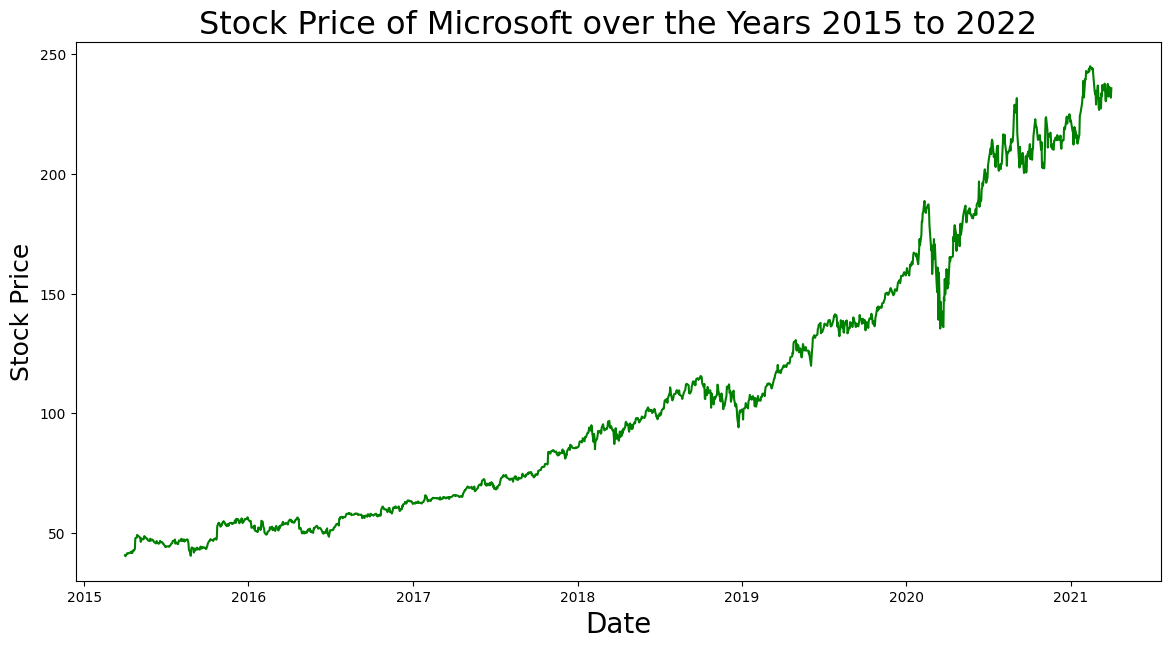

In [13]:
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=18)
plt.title('Stock Price of Microsoft over the Years 2015 to 2022',size=23)

# Linear Regression

In [14]:
def Linear_Regression_Prediction(df):
    Shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_data_set=df_new.iloc[:ceil(Shape*0.75)]
    valid_data_set=df_new.iloc[ceil(Shape*0.75):]
    print("**********STOCK PRICE PREDICTION BY USING LINEAR REGRESSION(LR)******")
    print('Shape of Training dataset Set',train_data_set.shape)
    print('Shape of Validation dataset Set',valid_data_set.shape)
    train=train_data_set.reset_index()
    valid=valid_data_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    Model = LinearRegression()
    Model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = Model.predict(np.array(x_valid).reshape(-1,1))
    RMS=np.sqrt(np.mean(np.power((np.array(valid_data_set['Close'])-preds),2)))
    print('(Root Mean Square Error)RMSE value on validation set:',RMS)
    valid_data_set['Predictions'] = preds
    plt.plot(train_data_set['Close'])
    plt.plot(valid_data_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=18)
    plt.ylabel('Microsoft Stock Price',size=18)
    plt.title('Microsoft Stock Price Prediction by Linear Regression',size=18)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])



**********STOCK PRICE PREDICTION BY USING LINEAR REGRESSION(LR)******
Shape of Training dataset Set (1134, 1)
Shape of Validation dataset Set (377, 1)
(Root Mean Square Error)RMSE value on validation set: 58.36609230803357


<ipython-input-14-f7da3f5e0ec1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


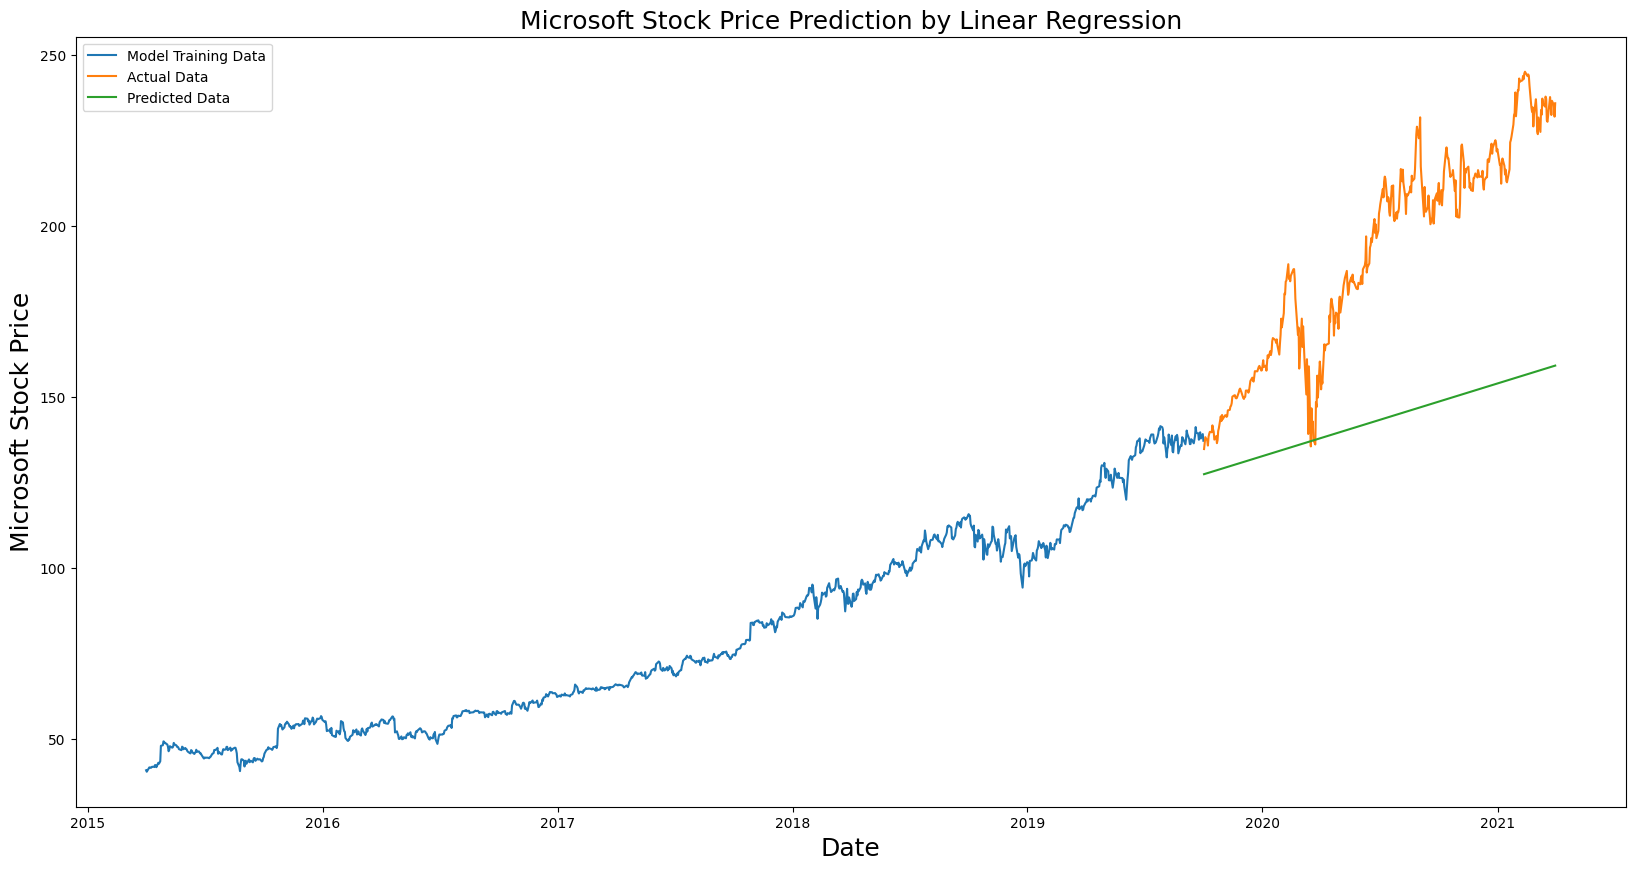

In [15]:
Linear_Regression_Prediction(df)

# K-Nearest Neighbours

In [16]:
def K_Nearest_Neighbours_Predict(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_data_set=df_new.iloc[:ceil(shape*0.75)]
    valid_data_set=df_new.iloc[ceil(shape*0.75):]
    print("*********Microsoft STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS*********")
    print('Shape of Training Data Set',train_data_set.shape)
    print('Shape of Validation Data Set',valid_data_set.shape)
    train=train_data_set.reset_index()
    valid=valid_data_set.reset_index()

    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]

    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    RMS=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('(Root Mean Square Error) RMSE value on validation set:',RMS)
    valid_data_set['Predictions'] = preds
    plt.plot(train_data_set['Close'])
    plt.plot(valid_data_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=18)
    plt.ylabel('Microsft Stock Price',size=18)
    plt.title('Microsoft Stock Price Prediction by K-Nearest Neighbors',size=18)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

*********Microsoft STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS*********
Shape of Training Data Set (1134, 1)
Shape of Validation Data Set (377, 1)
(Root Mean Square Error) RMSE value on validation set: 112.9467566922719


<ipython-input-16-e758438fca59>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


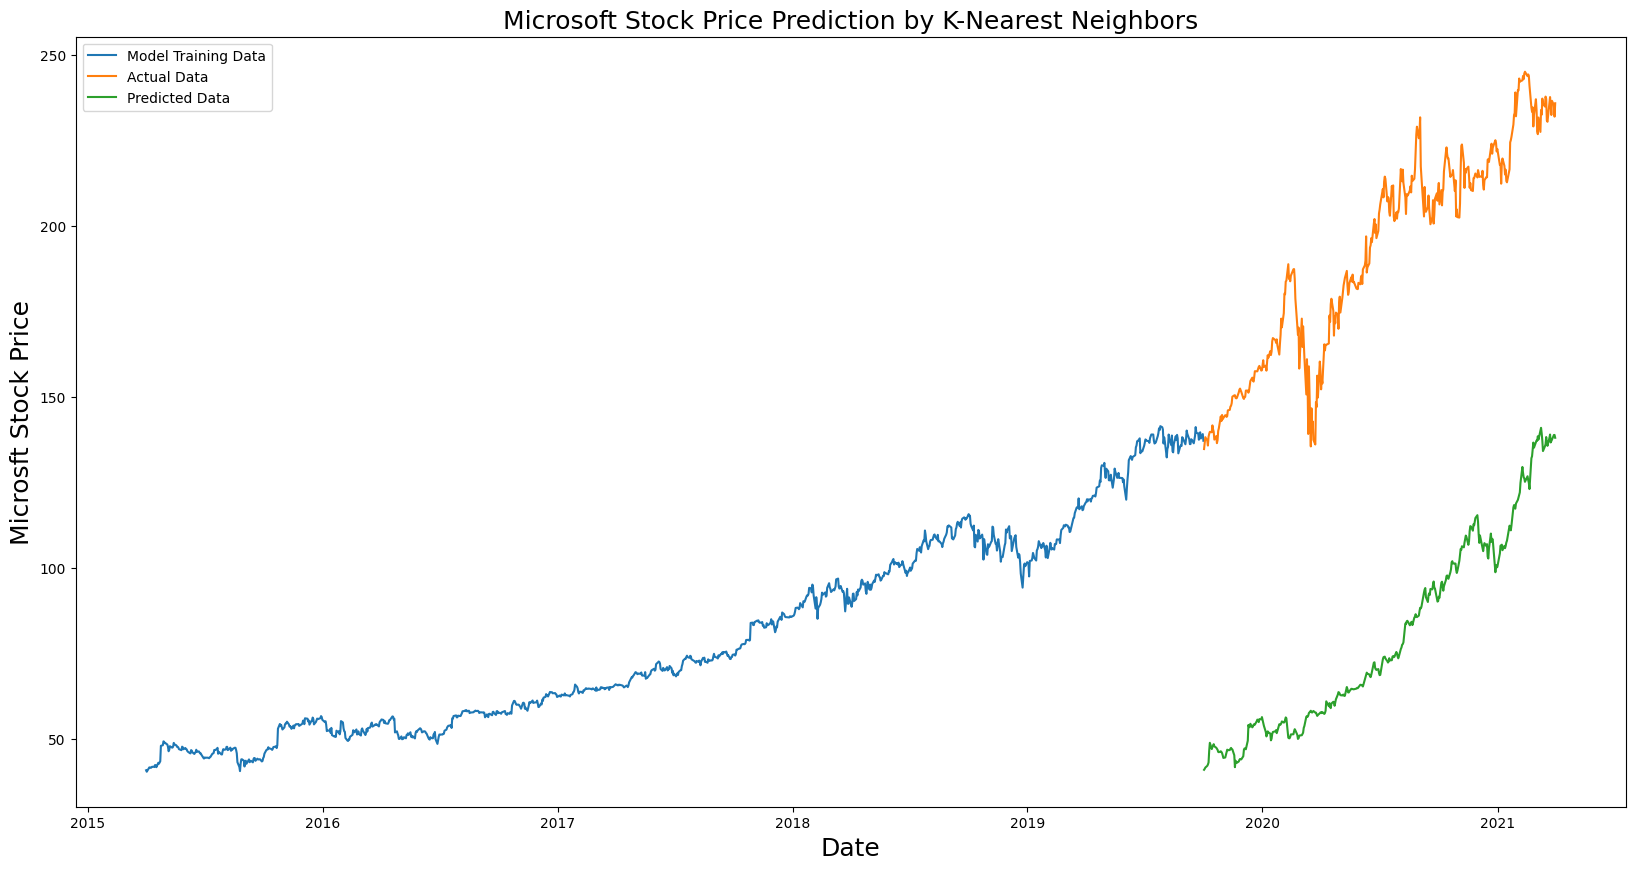

In [17]:
K_Nearest_Neighbours_Predict(df)

# Long Short Term Memory (LSTM)



In [18]:
def LSTM_Prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print("******** Microsoft STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM) *******")
    print('Shape of Training data Set',train.shape)
    print('Shape of Validation data Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    X_train, Y_train = [], []
    for i in range(40,len(train)):
        X_train.append(scaled_data[i-40:i,0])
        Y_train.append(scaled_data[i,0])
    X_train, Y_train = np.array(X_train), np.array(Y_train)
    Y_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    Model = Sequential()
    Model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    Model.add(LSTM(units=50))
    Model.add(Dense(1))
    Model.compile(loss='mean_squared_error', optimizer='adam')
    Model.fit(X_train, Y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = Model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    RMS=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('(Root Neab Square Error) RMSE value on validation set:',RMS)
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Microsoft Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])



******** Microsoft STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM) *******
Shape of Training data Set (1134, 1)
Shape of Validation data Set (377, 1)
1094/1094 - 10s - loss: 5.9603e-04 - 10s/epoch - 9ms/step
12/12 [==============================] - 1s 4ms/step
(Root Neab Square Error) RMSE value on validation set: 17.203310138938047


<ipython-input-18-21b408202f74>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


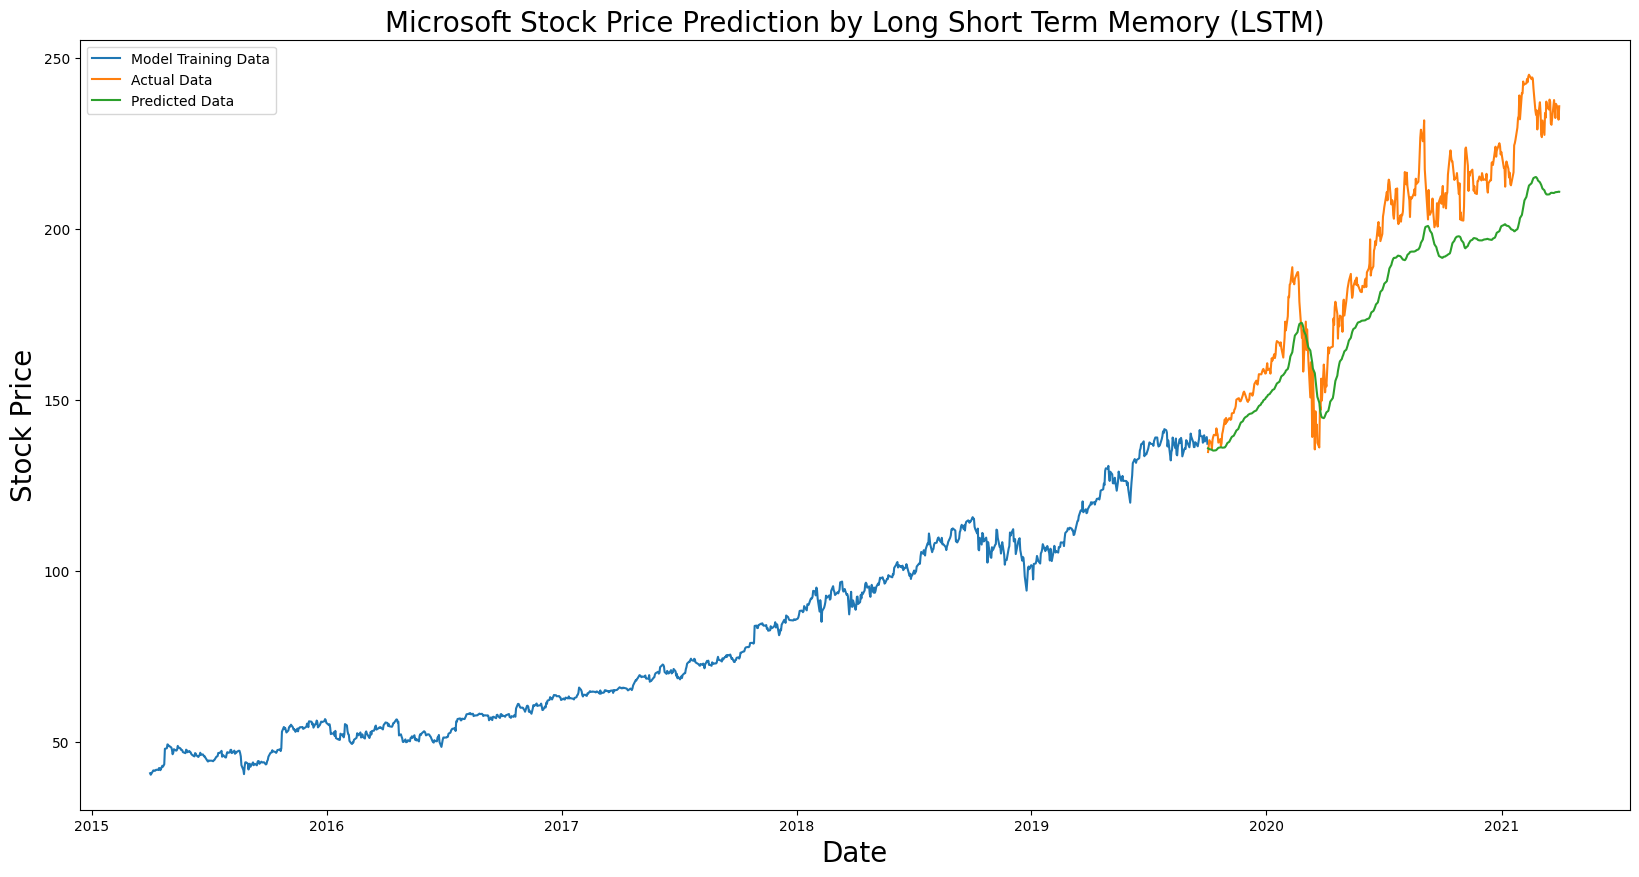

In [23]:
LSTM_Prediction(df)

# Decision_Tree_Prediction (tree)



In [33]:
def Decision_Tree_Prediction(df):
    shape = df.shape[0]
    df_new = df[['Close']]
    dataset = df_new.values
    train = df_new[:int(shape*0.75)]
    valid = df_new[int(shape*0.75):]

    print("******** Microsoft STOCK PRICE PREDICTION BY DECISION TREE REGRESSOR *******")
    print('Shape of Training data Set', train.shape)
    print('Shape of Validation data Set', valid.shape)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    X_train, Y_train = [], []
    for i in range(40, len(train)):
        X_train.append(scaled_data[i-40:i, 0])
        Y_train.append(scaled_data[i, 0])

    X_train, Y_train = np.array(X_train), np.array(Y_train)

    decision_tree = DecisionTreeRegressor()
    decision_tree.fit(X_train, Y_train)

    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])

    X_test = np.array(X_test)

    closing_price = decision_tree.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price.reshape(-1, 1))

    RMS = np.sqrt(mean_squared_error(valid, closing_price))
    print('(Root Mean Square Error) RMSE value on validation set:', RMS)

    valid['Predictions'] = closing_price

    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Microsoft Stock Price Prediction by Decision Tree Regressor', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    plt.show()

# Call the function with your DataFrame containing the Microsoft stock data
# Decision_Tree_Prediction(your_dataframe)

******** Microsoft STOCK PRICE PREDICTION BY DECISION TREE REGRESSOR *******
Shape of Training data Set (1133, 1)
Shape of Validation data Set (378, 1)
(Root Mean Square Error) RMSE value on validation set: 62.21033653628369


<ipython-input-33-067e51ce6991>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


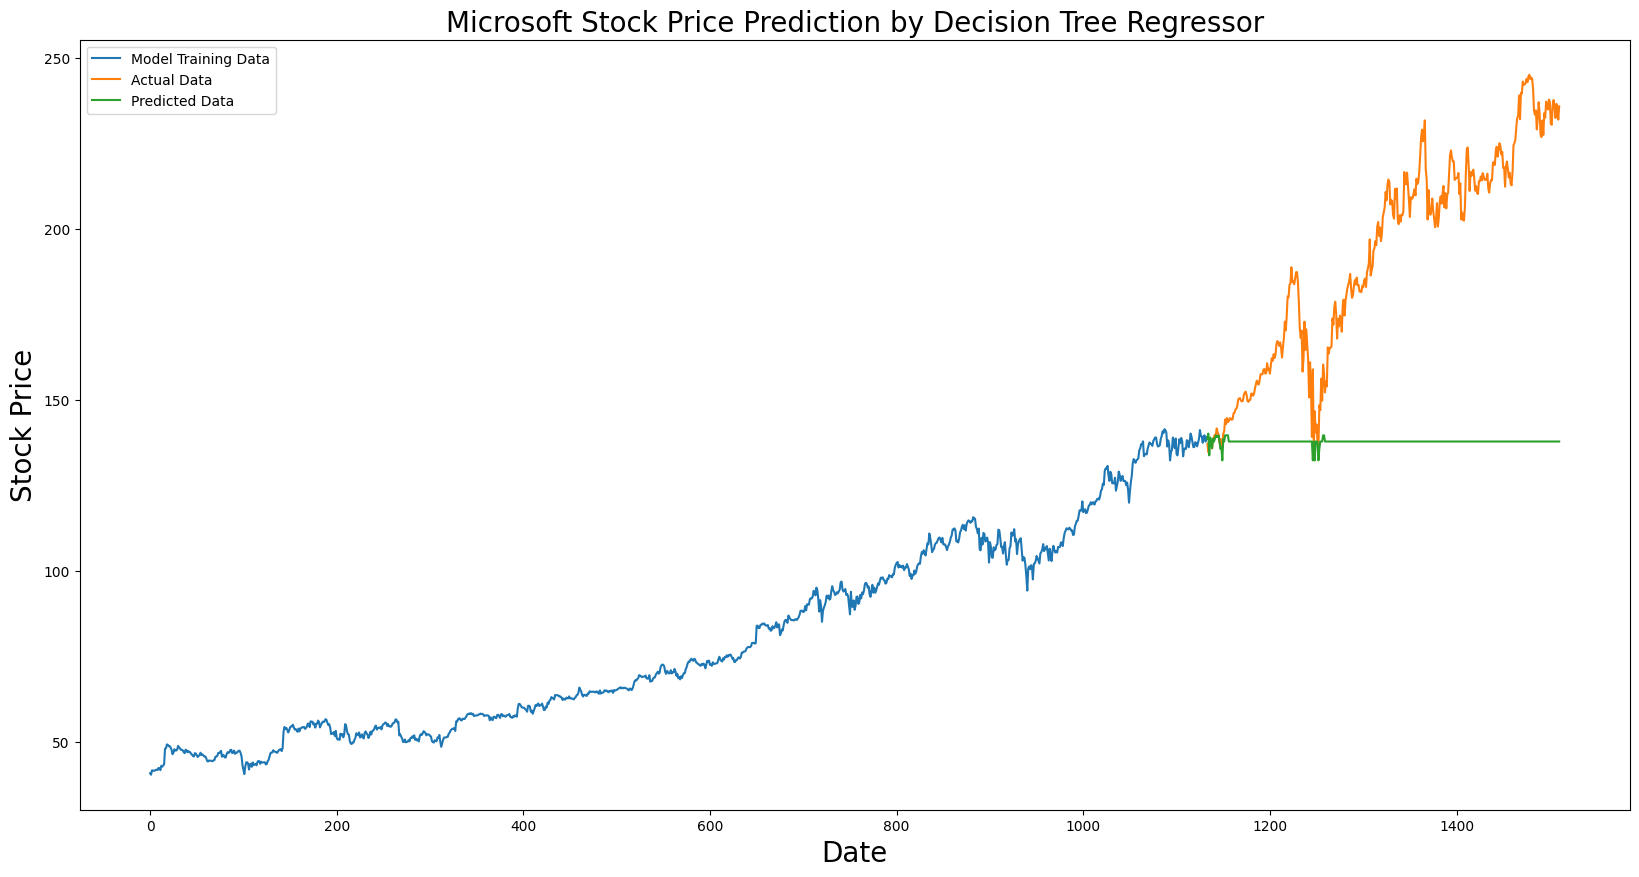

In [36]:
Decision_Tree_Prediction(df)